<a href="https://colab.research.google.com/github/Mishrakishan/Topological-Basics/blob/main/Time_Evolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Evolution: Split Operator Method

When cleaning my apartment, sometimes I just grab the nearest dirty thing to me and try to do something to it.  But that is not the most efficient way to get things done.  If I'm planning, I'll first dedicate my attention to one problem, like putting clothing away, then rotate my attention to something else, like dirty dishes.  I can keep focused on just one task and do it well.  Each problem I solve optimally in shorter intervals instead of tackling everything at once.  

That same principle applies to solving partial differential equations.  [1] called this principle one of the big ideas of numerical computation.  In numerics, we call it <b>Strang splitting</b>.  

We will be applying Strang splitting to solve the Schrondinger equation, but people use the same idea to a variety of problems, like ones with different timescales, length scales, or physical processes.  We will be using it to seperate out terms diagonal in position space from terms diagonal in momentum space.  

We can describe a class of general partial differential equations by
\begin{equation}
\frac{\partial}{\partial t}y = L_1(y,t)+L_2(y,t)
\end{equation}

Over a small time step, the following approximation holds
\begin{equation}
y(\delta t)= e^{L_1(y,0) \delta t+L_2(y,0) \delta t}y(0)
\end{equation}

For <b>Strang splitting</b>, instead of applying both operators together, we break them up into two.  I'll discuss non-commutativity later.
\begin{equation}
y(\delta t)= e^{L_1 (y,0) \delta t} e^{L_2(y,0) \delta t} y(0) = U_1 U_2 y(0)
\end{equation}
$U_1$ and $U_2$ are evolution operators. We can define
\begin{equation}
\tilde{y(0)}= U_2 y(0)
\end{equation}
so that
\begin{equation}
y (\delta t) = U_1 \tilde{y}(0)
\end{equation}

### Applying to Quantum Mechanics
Now let's take a look at the Schrodinger Equation:
\begin{equation}
i \hbar \frac{\partial}{\partial t} | \Psi \rangle = \mathcal{H} | \Psi \rangle
=
\left[ \frac{\hat{p}^2}{2m} + V(x) \right] | \Psi \rangle
=
\left[ \mathcal{H}_p + \mathcal{H}_x \right] | \Psi \rangle
\end{equation}
The Hamiltonian gets seperated into position terms and momentum terms.  For ease, let's define our unitary evolution operators,
\begin{equation}
U_p(\delta t)=e^{-\frac{i}{\hbar}\mathcal{H}_p \delta t}
\;\;\;\;\;
U_x (\delta t)= e^{-\frac{i}{\hbar}\mathcal{H}_x \delta t}
\end{equation}

I mentioned earlier that I would discuss non-commutativity.  We need to do that now.  We can't simply separate the evolution operator for the full Hamiltonian into two parts, because we would introduce terms proportional to the commutator.  
\begin{equation}
e^{A+B}=e^{A}e^{B}e^{[A,B]}
\end{equation}
$e^{A+B}$ expanded has terms that look like $AB$ <b>and</b> $BA$, whereas $e^{A}e^{B}$ only has terms that look like $AB$.  We lose the symmetry of the expression.  We can gain back an order of accuracy by symmetrizing our formula, calculating a time step by
\begin{equation}
|\Psi (\delta t) \rangle =
U_x (\delta t/2) U_p (\delta t) U_x (\delta t/2)
\end{equation}
But the next step will the start with $U_x (\delta t/2)$ !

\begin{equation}
|\Psi (2 \delta t) \rangle = \left(
U_x (\frac{\delta t}{2}) U_p (\delta t) U_x (\frac{\delta t}{2})\right)\left( U_x (\frac{\delta t}{2}) U_p (\delta t) U_x (\frac{\delta t}{2}) \right)
\end{equation}
\begin{equation}
= U_x (\frac{\delta t}{2}) U_p (\delta t) U_x (\delta t)  U_p (\delta t) U_x (\frac{\delta t}{2})
\end{equation}

All we need to do to add an order of accuracy is start the simulation with $U_x(\delta t/2)$ and end it with $U_x(\delta t/2)$, leaving everything else the same.  Pretty remarkable you can get that much of an improvement for that little work.  Once we apply this to a bunch of time steps, we get
\begin{equation}
U_x (\frac{\delta t}{2}) U_p (\delta t) \left( \prod_{n-1} U_x(\delta t) U_p (\delta t) \right) U_x (\frac{\delta t}{2}).
\end{equation}
We have to apply a few operators before starting the loop. Between the loop and a measurement, we have to apply an additional operator.

In the spatial domain, the momentum operator involves derivatives and is rather icky.  But in the momentum domain, we only have to multiply by $k^2/2m$.  Thanks to some nicely optimized libraries, we can just transform into the momentum domain with `fft`, solve the momentum problem there, and transform back with `ifft`.

## Rabi Oscillations

To demonstrate time evolution in a simple system with interesting physics, I chose to apply the split operator to Rabi Oscillations between two harmonic oscillators.  

To get an idea of what will happen, we will use a qualitative model of two states weakly coupled to each other by a parameter $\epsilon$.  If we have the two minima sufficifiently seperated from each other, tunneling will happen slowly and will not significantly affect the shape of the eigenfunctions and their energies $E_0$.  Instead of of solving for the shape of the wavefunction, we solve a two-state Hamiltonian that looks like this,

\begin{equation}i \hbar \frac{\partial}{\partial t}
\begin{bmatrix}
| \phi_r \rangle  \\
| \phi_l \rangle
\end{bmatrix}
= \begin{bmatrix}
E_0  & \epsilon \\
ϵ & E_0 \\
\end{bmatrix}
\begin{bmatrix}
| \phi_r \rangle \\
| \phi_l \rangle
\end{bmatrix}
\end{equation}
The eigenvalues and corresponding eigenvectors of the matrix are,
\begin{equation}
\lambda_1 = E_0 + \epsilon \;\;\;\;\;\;
\lambda_2 = E_0 - \epsilon
\end{equation}

\begin{equation}
\vec{v}_{1} = \begin{bmatrix}
| \phi_r \rangle \\
| \phi_l \rangle
\end{bmatrix}
\;\;\;\;\;
\vec{v}_2 = \begin{bmatrix}
| \phi_r \rangle \\
- |\phi_l \rangle
\end{bmatrix}
\end{equation}

If a wavefunction starts purely in the right state, we want to choose a combination of our eigenvectors that sets the left state to zero at $t=0$.  The resulting wavefunction will evolve as,
\begin{equation}
| \Psi (t) \rangle = \frac{1}{\sqrt{2}}e^{-\frac{i}{\hbar} E_0 t } \left(
e^{-\frac{i}{\hbar} \epsilon t} \begin{bmatrix}
| \phi_r \rangle \\
| \phi_l \rangle
\end{bmatrix}
+ e^{\frac{i}{\hbar} \epsilon t} \begin{bmatrix}
| \phi_r \rangle \\
-| \phi_l \rangle
\end{bmatrix}
\right)
\end{equation}

\begin{equation}
= \sqrt{2} e^{-\frac{i}{\hbar} E_0 t } \begin{bmatrix}
\cos \frac{\epsilon t}{\hbar} | \phi_r \rangle \\
i \sin \frac{\epsilon t}{\hbar} | \phi_l \rangle
\end{bmatrix}
\end{equation}

Thus this simple phenomological model shows us how we can expect the wavefunction to move back and forth between the two wells in a cyclical manner, with a period proportional to the rate of tunneling.

#Input Parameters

## Automatic Evaluation Parameters

Given the parameters above, we can calculate the following variables that we will use in the code.

Note: `k` Gave me a bit of a headache. The algorithm depends quite a bit on the conventions `fft` decides to use ;(
Currently, I'm using odd `N`.  You'll have to change the formula if you use even `N`.

## The Potentials and Evolution Operators

## The Unperturbed Wavefunctions

The ground state for a harmonic oscillator is a Gaussian
\begin{equation}
\langle x | \phi \rangle= \phi (x) = \frac{1}{\pi^{1/4}} e^{-\frac{x^2}{2}}
\end{equation}
We assume $\omega = \hbar = m = 1$ for sake of convenience.


## FFT's

This algorithm runs a large number of Fast Fourier Transforms and Inverse Fast Fourier Transforms.  To speed the process, we can tell the computer to spend some time, in the beginning, allocating the right amount of space and optimizing the routine for the particular size and type of array we are passing it.  

The next cell does this, by using `plan_fft` and `plan_ifft` to generate objects that can act on our arrays as operators.

## Occupancy of each state

To measure the occupancy of the total wavefunction in either the left or right well groundstate, I compute the value
\begin{equation}
c_r=\langle \Psi | \phi_r \rangle  = \int \Psi^* (x) \phi_r(x) dx \;\;\;\;\;\;\; p_r=c_r^2
\end{equation}
\begin{equation}
c_l = \langle \Psi | \phi_l \rangle = \int \Psi^* (x) \phi_l (x) dx\;\;\;\;\;\;\; p_l = c_l^2
\end{equation}
The probability of being in the state is the coefficient squared.

Though in theory these values will always be real, numerical errors introduce some errors, and Julia will assume that the answer is complex.  Therefore, we need to apply `abs` to make the numbers `Float64` instead of `Complex{Float64}`.

PyPlot generated png's strung together:
![gif](../images/TimeEvolution/doublewell.gif)
Plots generated gif:
![gif2](../images/TimeEvolution/evolution_plots.gif)

The faster one can perform Fourier Transforms, the faster one can perform this algorithm.  Therefore, scientists, such as [2], will use multiple cores or GPU's.  

In addition to real time evolution, algorithms like this can determine the ground state of an arbitrary system by imaginary time evolution.  Soon, I will take the work covered here and look at this aspect of the algorithm.  


[1] Glowinski, Roland, Stanley J. Osher, and Wotao Yin, eds. Splitting Methods in Communication, Imaging, Science, and Engineering. Springer, 2017.

[2] Heiko Bauke and Christoph H. Keitel. Accelerating the Fourier split operator method via graphics processing unit. Computer Physics Communications, 182(12):2454–2463 (2011)

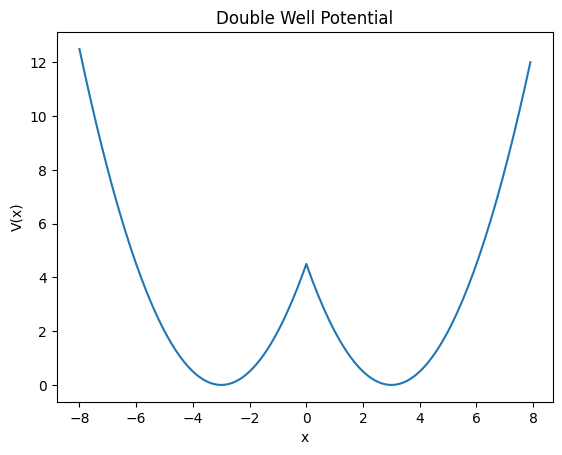

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq

# Set Time Parameters
t0 = 0
tf = 40000
dt = 0.1

# Set Space Grid Parameters
dx = 0.1
xmax = 8  # xmin will be -xmax
separation = 6  # Potential minima separation
nmeasure = 1000  # Measurement frequency

t = np.arange(t0, tf, dt)
x = np.arange(-xmax, xmax, dx)

nt = len(t)
N = len(x)

k = 2 * np.pi * fftfreq(N, d=dx)

occupation = np.zeros((nt // nmeasure, 2), dtype=complex)

Vx = 0.5 * (np.abs(x) - separation / 2) ** 2
Vk = k ** 2 / 2

Uxh = np.exp(-1j * Vx * dt / 2)
Ux = np.exp(-1j * Vx * dt)
Uf = np.exp(-1j * Vk * dt)

plt.figure()
plt.plot(x, Vx)
plt.xlabel("x")
plt.ylabel("V(x)")
plt.title("Double Well Potential")
plt.show()



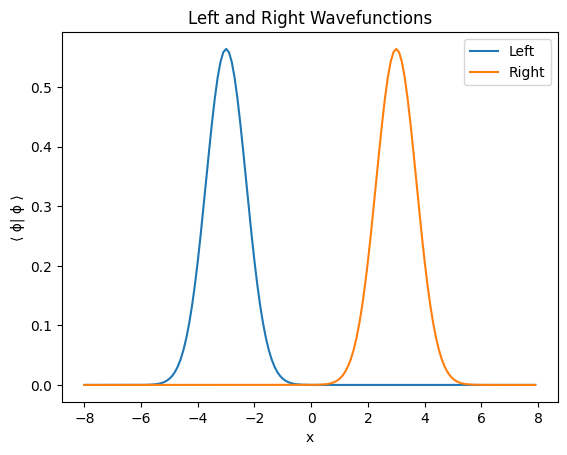

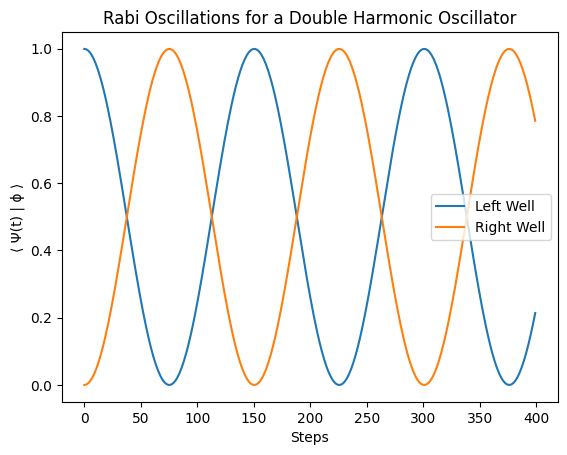

In [22]:
def phi(x):
    return np.pi ** (-0.25) * np.exp(-x ** 2 / 2)

phi_l = phi(x + separation / 2)
phi_r = phi(x - separation / 2)
Psi0 = phi_l.astype(complex)

plt.figure()
plt.plot(x, np.abs(phi_l) ** 2, label="Left")
plt.plot(x, np.abs(phi_r) ** 2, label="Right")
plt.xlabel("x")
plt.ylabel("⟨ ϕ| ϕ ⟩")
plt.title("Left and Right Wavefunctions")
plt.legend()
plt.show()

Psi = Psi0.copy()
Psi *= Uxh  # Apply half potential evolution

nmeas = 1000
c = np.zeros((nt // nmeas, 2))

jj = 0
for ii in range(nt):
    Psi *= Ux  # Potential evolution
    Psi_f = fft(Psi)
    Psi_f *= Uf  # Kinetic evolution
    Psi = ifft(Psi_f)

    if ii % nmeas == 0:
        Psi_t = Psi * Uxh  # Half-step correction
        c[jj, 0] = np.abs(np.sum(np.conj(Psi_t) * phi_l) * dx)
        c[jj, 1] = np.abs(np.sum(np.conj(Psi_t) * phi_r) * dx)
        jj += 1

plt.figure()
plt.plot(c[:, 0] ** 2, label="Left Well")
plt.plot(c[:, 1] ** 2, label="Right Well")
plt.xlabel("Steps")
plt.ylabel("⟨ Ψ(t) | ϕ ⟩")
plt.title("Rabi Oscillations for a Double Harmonic Oscillator")
plt.legend()
plt.show()
